<a href="https://colab.research.google.com/github/UXDynamicSolution/datamining_public/blob/main/material_reforzamiento_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Naive Bayes: ¿Conviene arrendar o comprar una casa?

## Introducción

Para mostrar el funcionamiento del modelo **Naive Bayes**, utilizaremos un ejemplo de la vida cotidiana relacionado con una decisión financiera común:

> **¿Conviene arrendar una casa? ¿Estoy desperdiciando dinero al pagar arriendo? ¿Me conviene pagar un dividendo por 20, 30 o 40 años?**

Este tipo de preguntas mezcla múltiples factores personales y económicos. Para efectos de este ejemplo, aplicaremos **Naive Bayes** para realizar una predicción automática, basándonos en variables personales como ingresos, ahorros, número de hijos, años de trabajo, y capacidad de financiamiento.

---

## Supuestos del ejemplo

Para simplificar el análisis y centrarnos en el modelo de machine learning, dejaremos fuera ciertos factores macroeconómicos como:

- Tasas de interés
- Inflación
- Variaciones del mercado inmobiliario

Nos enfocaremos solamente en los datos personales del usuario para ilustrar cómo **Naive Bayes** puede aprender patrones a partir de experiencias pasadas.

---

## Objetivo

Construir un modelo Naive Bayes que, dados ciertos valores personales, pueda responder si conviene **arrendar** o **comprar** una vivienda.

---

### Nombre del Autor

- ** Carlos Muñoz Salgado

---

Este ejemplo puede extenderse o complementarse en trabajos posteriores con datos reales y más variables del entorno económico, como parte de una evaluación más robusta.


[Dataset](https://drive.google.com/file/d/1W3HZS_QndTSQbUU5ajzg2pzXiDkkpc1L/view?usp=sharing)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

In [ ]:
df = pd.read_csv("comprar_arrendar.csv")

In [ ]:
df

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


#Descripcion de las columnas

# ¿Qué es el teorema de Bayes?

## Es una ecuación que describe la RELACIÓN DE PROBABILIDADES CONDICIONALES DE CANTIDADES ESTADISTICAS.

## En clasificación Bayesiana, estamos interesados en encontrar la probabilidad de que ocurra una "CLASE" dadas unas caracteristicas observadas (DATOS). Lo podemos escribir como



> # p (CLASE | DATOS )

## El teorema de Bayes nos dice cómo lo podemos expresar en terminos de cantidades que podemos calcular directamente.


## Teorema de Bayes

La fórmula del Teorema de Bayes es:

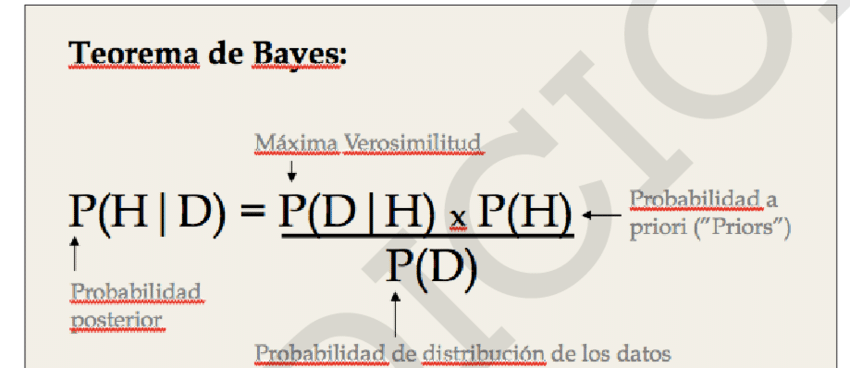

# CLASIFICADOR GAUSSIAN NAIVE BAYES
## De la teoria pasamos a la práctica

 Uno de los modelos clasificadores de machine learning / mineria de datos clasificadores más populares es el llamado en inglés "Gaussian Naive Bayes Classifier"

En base al conjunto de datos ***"comprar_arrendar.csv"*** aplicaremos este modelo para comprender su funcionamiento.

para el ejemplo aplicaremos 2 clases (comprar, arrendar) y 3 caracteristicas (ingresos, ahorros e hijos)

In [ ]:
# Determinamos P(Comprar) probabililidad de comprar

#total de registros en la columna comprar
total_comprar = df.groupby('comprar').size().sum()

#total de registros = 1 en nuestra columna comprar, se recomienda comprar
total_comprar_1 = (df['comprar'] == 1).sum()

#total de registros = 0 en nuestra columna comprar, no se recomienda comprar
total_comprar_0 = (df['comprar'] == 0).sum()

In [ ]:
total_comprar # cantidad total de registros

np.int64(202)

In [ ]:
total_comprar_1 # cantidad total de compras en estado 1, contexto: representa se recomienda comprar

np.int64(67)

In [ ]:
total_comprar_0 # cantidad total de compras en estado 0, contexto: representa no se recomienda comprar

np.int64(135)

determinamos P(comprar) la probabilidad de comprar con una sencilla formula manipulando los registros de nuestro conjunto de datos



> probabilidad = casos favorables / casos totales



In [ ]:
#creamos una variable para almacenar el resultado de total compras estado uno dividido el total de datos en nuestro conjunto
probabilidad_de_comprar = total_comprar_1 / total_comprar

In [ ]:
probabilidad_de_comprar #imprimimos el resultado del calculo de la probabilidad

np.float64(0.3316831683168317)

#Observaremos como estan distribuidos los datos


array([[<Axes: title={'center': 'ingresos'}>,
        <Axes: title={'center': 'gastos_comunes'}>,
        <Axes: title={'center': 'pago_coche'}>],
       [<Axes: title={'center': 'gastos_otros'}>,
        <Axes: title={'center': 'ahorros'}>,
        <Axes: title={'center': 'vivienda'}>],
       [<Axes: title={'center': 'estado_civil'}>,
        <Axes: title={'center': 'hijos'}>,
        <Axes: title={'center': 'trabajo'}>]], dtype=object)

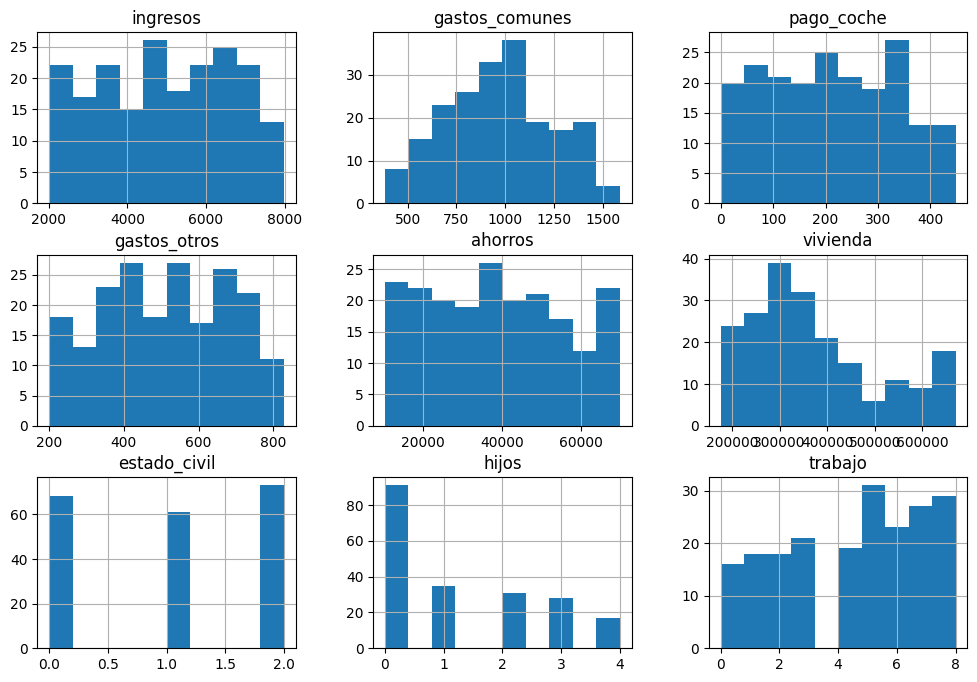

In [ ]:
df.drop(['comprar'], axis=1).hist(figsize=(12, 8)) # Creamos un gráfico sencillo para explorar la distribucion de los datos

# 📊 ¿Qué es una distribución normal?

La **distribución normal**, también llamada **distribución gaussiana**, es una de las distribuciones estadísticas continuas más importantes en estadística y ciencia de datos. Tiene una característica forma de **campana simétrica** alrededor de su media.

---

## 📌 Características Principales:

- **Forma simétrica** respecto a la media (\(\mu\)).
- **Forma de campana**, siendo la media también el punto más alto.
- Se define principalmente por dos parámetros:
  - **Media** (\(\mu\)): el valor promedio o central.
  - **Desviación estándar** (\(\sigma\)): mide la dispersión o cuánto varían los datos.

---

## 📐 Fórmula Matemática:

La distribución normal se representa matemáticamente mediante esta fórmula:

\[
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
\]

Donde:

- \(x\): valor observado.
- \(\mu\): media.
- \(\sigma\): desviación estándar.
- \(e\): constante de Euler (\(\approx 2.71828\)).

---

## 📈 Ejemplos Comunes:

- Alturas y pesos de personas en una población.
- Puntajes obtenidos en exámenes estandarizados.
- Errores experimentales en mediciones científicas.

---

## 📏 Regla Empírica (Regla 68-95-99.7):

En una distribución normal estándar ocurre lo siguiente:

- **68%** de los datos están dentro de **± 1 desviación estándar**.
- **95%** dentro de **± 2 desviaciones estándar**.
- **99.7%** dentro de **± 3 desviaciones estándar**.

Esto facilita la interpretación y análisis estadístico rápido.

---

## 🚩 ¿Por qué es importante?

La distribución normal permite describir muchos fenómenos del mundo real. Además, es crucial para realizar análisis estadísticos avanzados como:

- Inferencia estadística.
- Pruebas de hipótesis.
- Construcción de intervalos de confianza.

Debido a su versatilidad y frecuencia en la naturaleza, entender la distribución normal es fundamental en ciencia de datos.


#Prepararemos los datos para armar el modelo

## Crearemos 2 columnas nuevas, una GASTOS y otra FINANCIAR

In [ ]:
df['gastos'] = (df['gastos_comunes'] + df['gastos_otros'] + df['pago_coche']) #columna nueva gastos

In [ ]:
df['financiar'] = df['vivienda'] - df['ahorros'] # columna nueva financiar

In [ ]:
df.drop(['gastos_comunes', 'gastos_otros', 'pago_coche'], axis=1).head() #borramos columnas

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
0,6000,50000,400000,0,2,2,1,1600,350000
1,6745,43240,636897,1,3,6,0,1496,593657
2,6455,57463,321779,2,1,8,1,1926,264316
3,7098,54506,660933,0,0,3,0,1547,606427
4,6167,41512,348932,0,0,3,1,1606,307420


In [ ]:
df_reducido = df.drop(['gastos_comunes', 'gastos_otros','pago_coche'], axis=1) # creamos un df mas reducido

In [ ]:
df_reducido.describe() # aplicamos describe para observar nuestro conjunto de datos

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683,1698.752475,334599.970297
std,1682.862556,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988,324.838005,126607.099497
min,2008.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000,1007.000000,154716.000000
25%,3513.750000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000,1430.500000,240410.250000
50%,4947.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000,1669.500000,301177.000000
75%,6374.500000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000,1928.000000,393413.000000
max,7984.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000,2543.000000,618621.000000


# Comencemos a trabajar con nuestro modelo
## Vamos a utilizar Feature Selection para mejorar los resultados de este algoritmo. No utilizaremos las columnas de datos de nuestro conjunto como entrada, vamos a llamar a una clase de SKLEARN llam,ada SelectKBest donde seleccionaremos las 5 mejores caracteristicas y usaremos solamente esas recomendadas.

In [ ]:
X = df.drop(['comprar'], axis=1)

In [ ]:
y = df['comprar']

In [ ]:
best = SelectKBest(k=5)

In [ ]:
best

SelectKBest(k=5)

In [ ]:
X_new = best.fit_transform(X, y)

In [ ]:
X_new.shape

(202, 5)

In [ ]:
seleccionadas = best.get_support(indices=True)

In [ ]:
print(X.columns[seleccionadas])

Index(['ingresos', 'ahorros', 'hijos', 'trabajo', 'financiar'], dtype='object')


Usaremos esas 5 de la s11 caracteristicas que teniamos. Las que "más aportan" al momento de realizar la clasificacion. Revisaremos la correlacion de estos.

In [ ]:
caracteristicas_seleccionadas = X.columns[seleccionadas]

<Axes: title={'center': 'Pearson Correlation of Features'}>

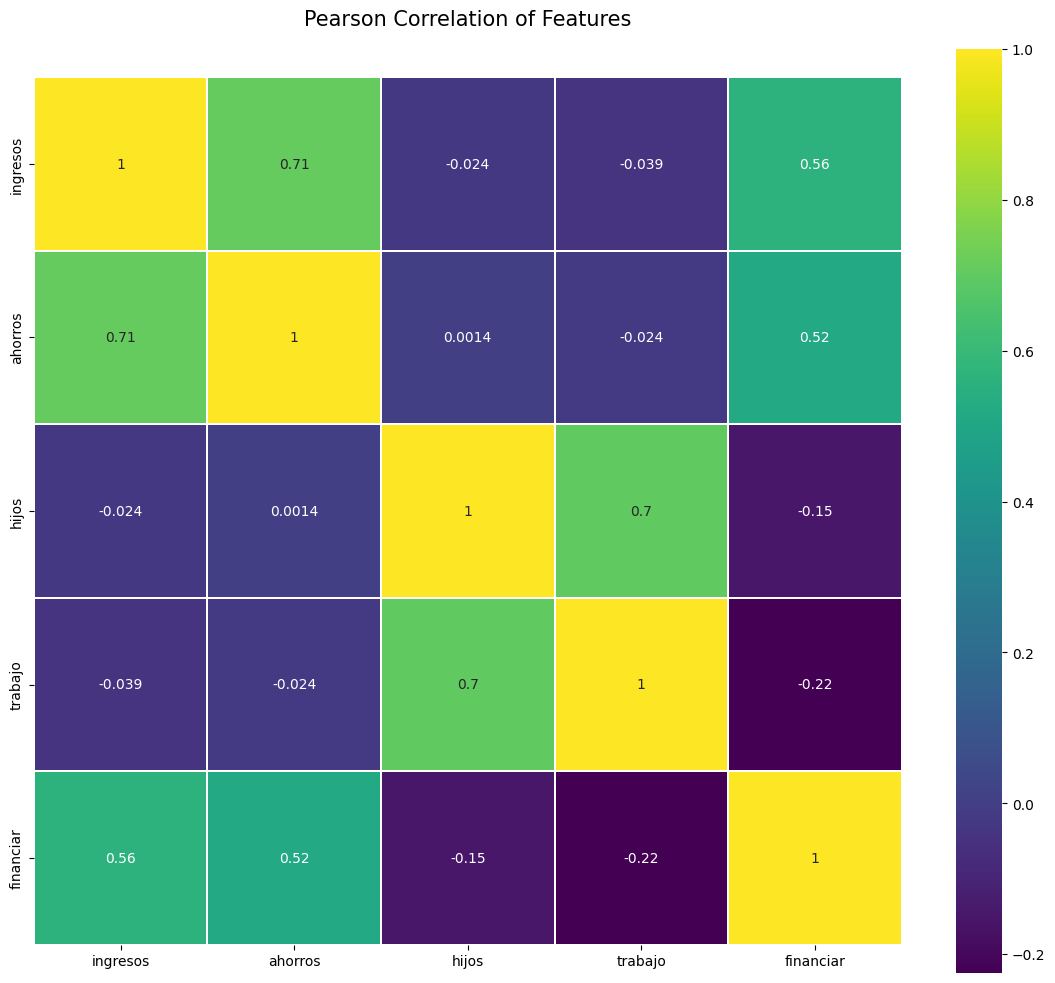

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df[caracteristicas_seleccionadas].astype(float).corr(),
           linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

## Observamos la matriz de correlacion y nos damos cuenta que en general los datos estan poco relacionados entre si, pero tenemos 2 valores de 0,7 (alta correlaccion) con lo que esperamos que sea suficiente para dar buenos resultados.

# Crearemos el modelo

## Necesitamos crear un conjunto de datos de entrenamiento y otro de test.

In [ ]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=6)

In [ ]:
y_train = X_train['comprar']

In [ ]:
y_train

,comprar
2,1
81,0
52,0
64,0
16,1
...,...
200,0
79,0
109,1
106,0


In [ ]:
y_test = X_test['comprar']

In [ ]:
y_test

,comprar
120,0
11,0
104,1
179,0
122,1
71,0
94,0
19,1
4,1
6,1


# Creamos nuestro modelo, lo ponemos a aprender con el ya conocido "fit()" y obtendrenmos predicciones sobre nuestro conjunto de test

In [ ]:
modelo = GaussianNB() #inicializamos el clasificador

In [ ]:
modelo.fit(X_train[caracteristicas_seleccionadas].values, y_train) #entrenando el modelo

GaussianNB()

In [ ]:
y_predict = modelo.predict(X_test[caracteristicas_seleccionadas].values) #obteniendo predicciones

In [ ]:
print(modelo.score(X_train[caracteristicas_seleccionadas].values, y_train)) #PRECISION DEL SET DE ENTRENAMIENTO

0.8695652173913043


In [ ]:
print(modelo.score(X_test[caracteristicas_seleccionadas].values, y_test)) #PRECISION DEL SET DE TEST

0.9024390243902439


#Si observamos los resultados del rendimiento del modelo, obtenemos un 90% de aciertos (accuracy) con nuestros datos de test usando el clasificador bayesiano.

# PROBAR EL MODELO, ¿COMPRAMOS O ARRENDAMOS CASA?
## Supongamos que hemos desarrollado un sitio web o aplicación para celulares moviles para vender créditos y recomendar a los usuarios si conviene comprar o arrendar en base a sus caracteristicas financieras particulares.

In [ ]:
# Desarrollaremos una funcion para que devuelva la recomendación usando el modelo ya entrenado

def response_desde_modelo_naive_bayes(ingresos, ahorros, hijos, trabajo, financiar):
    datos_entrada = [[ingresos, ahorros, hijos, trabajo, financiar]]
    var_responder = modelo.predict(datos_entrada)[0]

    if var_responder == 0:
        return "En base a su historial, se recomienda 'arrendar'."
    else:
        return "En base a su historial, se recomienda 'comprar'."

In [ ]:
# Llamamos a la funcion ingresando valores de prueba, si esta funcion fuera de un metodo productivo podria estar recibiendo parametros de un form web

respuesta = response_desde_modelo_naive_bayes(2000, 5000, 0, 5, 200000)
print(respuesta)

En base a su historial, se recomienda 'arrendar'.


# Como les mencione en clases, "Si aprendo algo nuevo en informática y puedo escribirlo como una función, manipularlo, adaptarlo a distintos casos y reutilizarlo, entonces realmente lo entiendo"
